# This is my answer to Exercise 1 question 1

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control

# define the value of all the constant variables.
Ca = 20000
m = 1888.6
lf = 1.55
lr = 1.39
Iz = 25854

# Check the controllability and observability of the system at the following
# longitudinal velocities: 2 m/s, 5 m/s and 8 m/s.
for i in range(3):
    if i == 0:
        Vx = 2
    elif i == 1:
        Vx = 5
    else:
         Vx = 8
    A = np.array([[0, 1, 0, 0],
    [0, -4*Ca / (m * Vx), 4*Ca/m, -(2*Ca*(lf - lr))/(m*Vx)],
    [0, 0, 0, 1],
    [0, -(2*Ca*(lf - lr)) / (Iz * Vx), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(lf*lf + lr * lr)) / (Iz * Vx)]])

    B = np.array([[0, 0], [2*Ca / m, 0], [0, 0], [(2 * Ca* lf) / Iz, 0]])

    C = np.identity(4)

    P = np.hstack((B, np.dot(A, B), np.dot(np.linalg.matrix_power(A, 2), B), np.dot(np.linalg.matrix_power(A, 3), B)))
    Q = np.vstack((C, np.dot(C, A), np.dot(C, np.linalg.matrix_power(A, 2)), np.dot(C, np.linalg.matrix_power(A, 3))))
    rankP = np.linalg.matrix_rank(P)
    rankQ = np.linalg.matrix_rank(Q)
    print("When Vx = ", Vx, "m/s:")
    if rankP == 4:
        print("The rank of P is", rankP, ",so this system is controllable.")
    else:
        print("The rank of P is", rankP, ",so this system is not controllable.")
    if rankQ == 4:
        print("The rank of Q is", rankQ, ",so this system is observable.")
    else:
        print("The rank of Q is", rankQ, ",so this system is not observable.")
    print()

When Vx =  2 m/s:
The rank of P is 4 ,so this system is controllable.
The rank of Q is 4 ,so this system is observable.

When Vx =  5 m/s:
The rank of P is 4 ,so this system is controllable.
The rank of Q is 4 ,so this system is observable.

When Vx =  8 m/s:
The rank of P is 4 ,so this system is controllable.
The rank of Q is 4 ,so this system is observable.



# Collusion:
When the longitudinal velocities equals to 2 m/s, 5 m/s and 8 m/s, the system is both controllable and observable.

# This is my answer to Exercise 1 question 2

In [8]:
velocity = np.linspace(1, 40, 1000).reshape(1000,1)
rate = np.empty([1000,1])
poles = np.empty([1000,4])
for i in range(velocity.shape[0]):
    Vx = velocity[i]

    # Build the system.
    A = np.array([[0, 1, 0, 0],
    [0, -4*Ca / (m * Vx), 4*Ca/m, -(2*Ca*(lf - lr))/(m*Vx)],
    [0, 0, 0, 1],
    [0, -(2*Ca*(lf - lr)) / (Iz * Vx), (2*Ca*(lf - lr)) / Iz, (-2*Ca*(lf*lf + lr * lr)) / (Iz * Vx)]], dtype = float)
    B = np.array([[0, 0], [2*Ca / m, 0], [0, 0], [(2 * Ca* lf) / Iz, 0]])
    C = np.identity(4)
    D = np.array([[0, 0],[0, 0],[0, 0],[0, 0]])
    sys = control.StateSpace(A, B, C, D)

    # Calculate the value of logarithm
    P = np.hstack((B, np.dot(A, B), np.dot(np.linalg.matrix_power(A, 2), B), np.dot(np.linalg.matrix_power(A, 3), B)))
    _, delt,_ = np.linalg.svd(P)
    delt1 = max(delt)
    deltn = min(delt)
    rate[i] = np.log10(delt1 / deltn)

    #Calculate the poles of the system.
    poles_this_time = control.pole(sys)
    for j in range(4):
        poles[i,j] = poles_this_time[j].real

# Plot the logarithm of the greatest singular value divided by the smallest versus Vx (m/s)

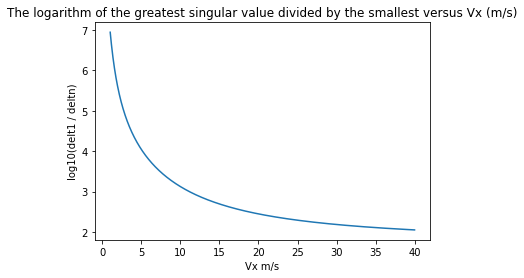

In [9]:
# Plot the logarithm of the greatest singular value divided by the smallest versus Vx (m/s)
plt.figure(1)
plt.title("The logarithm of the greatest singular value divided by the smallest versus Vx (m/s)")
plt.plot(velocity, rate)
plt.xlabel("Vx m/s")
plt.ylabel("log10(delt1 / deltn)")
plt.show()

# Plot the real part of the poles versus Vx (m/s)

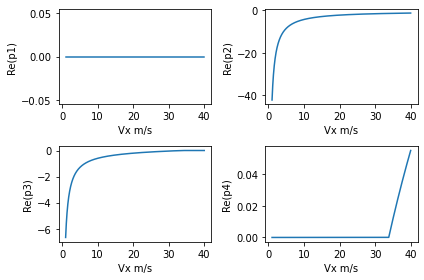

In [10]:
# Plot the real part of the poles versus Vx (m/s).
plt.figure(2)

plt.subplot(2, 2, 1)
plt.xlabel("Vx m/s")
plt.ylabel("Re(p1)")
plt.plot(velocity, poles[:,0])

plt.subplot(2, 2, 2)
plt.xlabel("Vx m/s")
plt.ylabel("Re(p2)")
plt.plot(velocity, poles[:,1])

plt.subplot(2, 2, 3)
plt.xlabel("Vx m/s")
plt.ylabel("Re(p3)")
plt.plot(velocity, poles[:,2])

plt.subplot(2, 2, 4)
plt.xlabel("Vx m/s")
plt.ylabel("Re(p4)")
plt.plot(velocity, poles[:,3])

plt.tight_layout()
plt.show()


# Conclusion:

From the first plot we can see that the logarithm of the ratio of the maximum singular value and the minimum singular value of the controllability matrix goes to zero as we increase the speed. This means that the smallest singular value of the controllability matrix becomes bigger and bigger when we increase the speed of the car. This will lead to a higher probability of the controllability matrix to be full rank. In other words, the system will be more and more controllable when we increase the speed of the car. From the second plot we can see that, the real parts of system poles will move from negative towards positive as we increase the car speed. When the speed is greater than 33 or 34 m/s, the real part of the fourth pole of the system will be greater than 0, which means this system will be unstable. Overall, the system will be less and less stable when we increase the speed of the car. When the car speed is greater than 33 or 34 m/s, the system will become unstable. 